In [1]:
import os
import sys
# 現在のノートブック位置: notebooks/demo
# プロジェクトルートは notebooks/demo/ から 2階層上: "../.."
PROJECT_ROOT = os.path.abspath(os.path.join("..", ".."))

# Python のモジュール検索パスに追加
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

# print("PROJECT_ROOT:", PROJECT_ROOT)
# print("sys.path:", sys.path)

In [2]:
# from src.config import RAW_DATA_DIR
import numpy as np
import matplotlib.pyplot as plt
from src.dataset.process import load_npz_file, load_npz_signal, target_image, collected_signal
from src.dataset.speckle_pred import speckle_pred_inv
from src.utils.inv_recon import img_reconstruction
from src.utils.utils import standardize, min_max_normalize_np
file_y = "Rand+Mnist+Rand_pix28x28_image(1500+10+1500)x2_sig2500x4wave.npz"
file_x = "Rand+Mnist+Rand_size28x28_image(1500+10+1500)x2.npz"

In [3]:
Y_random, Y_mnist = collected_signal(path=file_y, select="black")
X_random, X_mnist = target_image(path=file_x, select="black")
S = speckle_pred_inv(path_x=file_x, path_y=file_y, select="black")

In [4]:
print(S.shape)

(784, 10000)


In [5]:
S.min()

-0.003202622393961231

In [6]:
X_mnist_first = img_reconstruction(S * 2, Y_mnist)

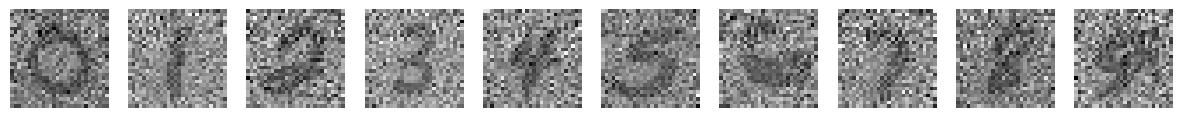

In [7]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # 1行10列でサブプロットを作成
for i in range(10):
    img = X_mnist_first[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')  # 軸を非表示にする
plt.show()

In [8]:
X_mnist_first

array([[ 1.00877528,  0.17317024,  0.14914202, ...,  0.23298373,
        -0.02870994, -0.07269591],
       [ 0.63176103,  0.69434252,  0.16148843, ...,  1.01281884,
         0.40511768,  0.07463939],
       [-0.67991757,  0.67445692,  0.84492632, ...,  0.85014939,
         0.2972409 , -0.12948887],
       ...,
       [ 0.57448135,  0.48695971, -1.07776623, ...,  0.79603956,
         0.63348701, -0.87896318],
       [ 0.09605635,  1.22610505,  0.282215  , ...,  1.00180753,
        -0.38766885,  0.45562592],
       [ 0.50825093,  0.35817796, -0.12756088, ...,  0.54027773,
         0.08245952,  0.39759274]])

In [9]:
X_mnist_first_std = standardize(X_mnist_first)

mean (before): 0.3623369635534981
std (before): 0.5026434433285158
mean (after): 9.969349608878957e-17
std (after): 0.9999998010518562


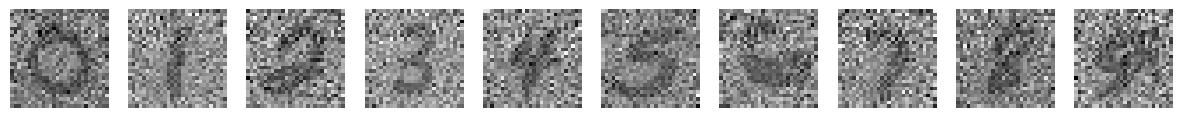

In [10]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # 1行10列でサブプロットを作成
for i in range(10):
    img = X_mnist_first_std[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')  # 軸を非表示にする
plt.show()

In [11]:
X_mnist_first_std.min()

-3.761739056888821

In [12]:
X_mnist_first_mx = min_max_normalize_np(X_mnist_first)

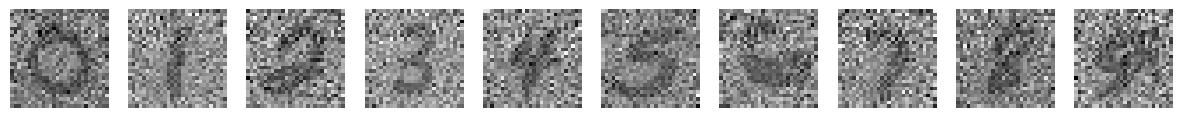

In [13]:
fig, axes = plt.subplots(1, 10, figsize=(15, 2))  # 1行10列でサブプロットを作成
for i in range(10):
    img = X_mnist_first_mx[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')  # 軸を非表示にする
plt.show()

In [14]:
X_mnist_first_mx

array([[0.67581816, 0.45324783, 0.44684771, ..., 0.46917964, 0.39947537,
        0.38775934],
       [0.57539729, 0.59206638, 0.45013628, ..., 0.67689519, 0.51502895,
        0.42700332],
       [0.22602081, 0.58676969, 0.63217563, ..., 0.63356684, 0.48629508,
        0.37263206],
       ...,
       [0.56014037, 0.53682825, 0.12005052, ..., 0.61915423, 0.57585701,
        0.17300336],
       [0.4327079 , 0.73370575, 0.4822928 , ..., 0.67396224, 0.30386368,
        0.52848224],
       [0.54249935, 0.50252617, 0.3731456 , ..., 0.55102995, 0.42908627,
        0.51302462]])